In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Model performance will be evaluated using accuracy, precision, recall, and F1-score, 
# alongside the area under the receiver operating characteristic (ROC) curve (AUC).
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [4]:
# Models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [5]:
data = pd.read_csv("combined_data_normalized.csv")
data.head()

gameId  playId  yardsToGo  yardlineSide  yardlineNumber  gameClock  \
0  2022100908    3537        1.0             0            0.82   0.524444   
1  2022100908     619        1.0             0            0.30   0.324444   
2  2022100908    3731        1.0             1            0.38   0.314444   
3  2022100908    1821        1.0             0            0.64   0.077778   
4  2022100908    2392        1.0             1            0.52   0.697778   

   preSnapHomeScore  preSnapVisitorScore  passLength  penaltyYards  ...  \
0          0.875000             0.291667        0.30           0.0  ...   
1          0.000000             0.000000        0.00           0.0  ...   
2          0.875000             0.291667        0.35           0.0  ...   
3          0.416667             0.000000        0.00           0.0  ...   
4          0.541667             0.000000        0.00           0.0  ...   

   down_1  down_2  down_3  down_4  quarter_1  quarter_2  quarter_3  quarter_4  \
0    True   False   False   False      False      False      False       True   
1    True   False   False   False       True      False      False      False   
2    True   False   False   False      False      False      False       True   
3    True   False   False   False      False       True      False      False   
4    True   False   False   False      False      False       True      False   

   quarter_5  homeTeamPointDifferential  
0      False                   0.583333  
1      False                   0.000000  
2      False                   0.583333  
3      False                   0.416667  
4      False                   0.541667  

[5 rows x 37 columns]

In [6]:
X = data.drop(['winningTeamIndicator','gameId', 'playId'], axis=1) 
y = data['winningTeamIndicator']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

### Base Model

In [7]:
logistic_model = LogisticRegression(max_iter=10000)

logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)

In [8]:
print('Accuracy:', accuracy_score(y_test, y_pred_logistic))
print('Precision:', precision_score(y_test, y_pred_logistic))
print('Recall:', recall_score(y_test, y_pred_logistic))
print('f1:', f1_score(y_test, y_pred_logistic))
print('roc:', roc_auc_score(y_test, y_pred_logistic))

Accuracy: 0.6637309847878302
Precision: 0.6712898751733704
Recall: 0.7256371814092953
f1: 0.6974063400576369
roc: 0.6592103432819673


Cross Validation

In [9]:
logistic_model = LogisticRegression(max_iter=10000)

cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=10)

print("Cross-Validation Scores:", cv_scores)

print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation Scores: [0.68768769 0.65565566 0.7007007  0.65165165 0.70870871 0.68168168
 0.67167167 0.68768769 0.67034068 0.67635271]
Mean Accuracy: 0.6792138832218992
Standard Deviation: 0.01714584646296333


### Grid Search

In [10]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['lbfgs', 'liblinear']
}

logistic_model = LogisticRegression(max_iter=10000)

grid_search_lr = GridSearchCV(estimator=logistic_model, param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_lr.fit(X_train, y_train)

print("Best Parameters (Logistic Regression):", grid_search_lr.best_params_)

print("Best Cross-Validation Score (Logistic Regression):", grid_search_lr.best_score_)

Best Parameters (Logistic Regression): {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Score (Logistic Regression): 0.6834198244313416


C:\Users\icyle\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\icyle\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\icyle\anaconda3\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\icyle\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual

In [11]:
y_pred_grid_lr = grid_search_lr.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred_grid_lr))
print('Precision:', precision_score(y_test, y_pred_grid_lr))
print('Recall:', recall_score(y_test, y_pred_grid_lr))
print('f1:', f1_score(y_test, y_pred_grid_lr))
print('roc:', roc_auc_score(y_test, y_pred_grid_lr))

Accuracy: 0.6677341873498799
Precision: 0.6742738589211619
Recall: 0.7308845577211395
f1: 0.7014388489208633
roc: 0.6631226912317039


### PCA

In [12]:
pca = PCA(n_components=0.95)  # Keep components that explain 95% of the variance
logistic_model = LogisticRegression(max_iter=10000)

pipeline = Pipeline([
    ('pca', pca),
    ('logistic', logistic_model)
])

pipeline.fit(X_train, y_train)

y_pred_pca_lr = pipeline.predict(X_test)

In [13]:
print('Accuracy:', accuracy_score(y_test, y_pred_pca_lr))
print('Precision:', precision_score(y_test, y_pred_pca_lr))
print('Recall:', recall_score(y_test, y_pred_pca_lr))
print('f1:', f1_score(y_test, y_pred_pca_lr))
print('roc:', roc_auc_score(y_test, y_pred_pca_lr))

Accuracy: 0.6649319455564452
Precision: 0.6719723183391003
Recall: 0.7278860569715142
f1: 0.6988125224901044
roc: 0.6603347810630767


# Random Forest

### Base Model

In [14]:
random_forest_model = RandomForestClassifier()

random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)

In [15]:
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf))
print('Recall:', recall_score(y_test, y_pred_rf))
print('f1:', f1_score(y_test, y_pred_rf))
print('roc:', roc_auc_score(y_test, y_pred_rf))

Accuracy: 0.7241793434747799
Precision: 0.7247386759581882
Recall: 0.7796101949025487
f1: 0.7511737089201878
roc: 0.7201315579323739


Cross Validation

In [16]:
rf_model = RandomForestClassifier(n_estimators=100)

cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=10)

print("Cross-Validation Scores (Random Forest):", cv_scores_rf)

print("Mean Accuracy (Random Forest):", cv_scores_rf.mean())
print("Standard Deviation (Random Forest):", cv_scores_rf.std())

Cross-Validation Scores (Random Forest): [0.74074074 0.72272272 0.73173173 0.72572573 0.74974975 0.71771772
 0.71571572 0.72372372 0.70841683 0.72144289]
Mean Accuracy (Random Forest): 0.7257687547266707
Standard Deviation (Random Forest): 0.011549688279230861


### Grid Search

In [17]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

rf_model = RandomForestClassifier()

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

print("Best Parameters (Random Forest):", grid_search_rf.best_params_)

print("Best Cross-Validation Score (Random Forest):", grid_search_rf.best_score_)

Best Parameters (Random Forest): {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Score (Random Forest): 0.7400879096422411


In [18]:
y_pred_grid_rf = grid_search_rf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred_grid_rf))
print('Precision:', precision_score(y_test, y_pred_grid_rf))
print('Recall:', recall_score(y_test, y_pred_grid_rf))
print('f1:', f1_score(y_test, y_pred_grid_rf))
print('roc:', roc_auc_score(y_test, y_pred_grid_rf))

Accuracy: 0.7429943955164131
Precision: 0.7353741496598639
Recall: 0.8103448275862069
f1: 0.7710413694721826
roc: 0.738076193861832


### PCA

In [19]:
pca = PCA(n_components=0.95)  # Keep components that explain 95% of the variance
rf_model = RandomForestClassifier(n_estimators=100)  

pipeline = Pipeline([
    ('pca', pca),
    ('random_forest', rf_model)
])

pipeline.fit(X_train, y_train)

y_pred_pca_rf = pipeline.predict(X_test)

In [20]:
print('Accuracy:', accuracy_score(y_test, y_pred_pca_rf))
print('Precision:', precision_score(y_test, y_pred_pca_rf))
print('Recall:', recall_score(y_test, y_pred_pca_rf))
print('f1:', f1_score(y_test, y_pred_pca_rf))
print('roc:', roc_auc_score(y_test, y_pred_pca_rf))

Accuracy: 0.6749399519615693
Precision: 0.6817548746518106
Recall: 0.7338830584707646
f1: 0.7068592057761733
roc: 0.6706356873109838


### Feature Importance

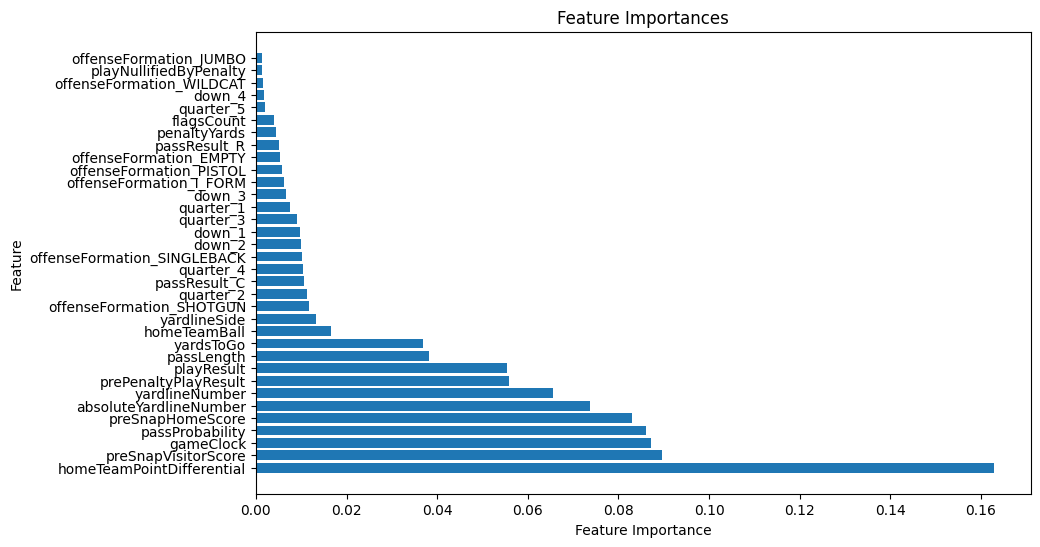

In [21]:
import matplotlib.pyplot as plt

# Create and train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Get feature importances and column names
feature_importances = rf_model.feature_importances_
column_names = X_train.columns

# Create a dictionary mapping column names to feature importances
feature_importance_dict = dict(zip(column_names, feature_importances))

# Sort feature importances in descending order
sorted_feature_importance_dict = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importance_dict)), list(sorted_feature_importance_dict.values()), align='center')
plt.yticks(range(len(sorted_feature_importance_dict)), list(sorted_feature_importance_dict.keys()))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# SVM

### Base Model

In [22]:
svm_model = SVC()

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

In [23]:
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print('Precision:', precision_score(y_test, y_pred_svm))
print('Recall:', recall_score(y_test, y_pred_svm))
print('f1:', f1_score(y_test, y_pred_svm))
print('roc:', roc_auc_score(y_test, y_pred_svm))

Accuracy: 0.6753402722177743
Precision: 0.6654016445287793
Recall: 0.7886056971514243
f1: 0.7217838765008576
roc: 0.6670691715997671


Cross Validation

In [24]:
svm_model = SVC()

cv_scores_svm = cross_val_score(svm_model, X_train, y_train, cv=5)

print("Cross-Validation Scores (SVM):", cv_scores_svm)

print("Mean Accuracy (SVM):", cv_scores_svm.mean())
print("Standard Deviation (SVM):", cv_scores_svm.std())

Cross-Validation Scores (SVM): [0.66766767 0.66466466 0.69219219 0.68502754 0.68052078]
Mean Accuracy (SVM): 0.6780145694016501
Standard Deviation (SVM): 0.010409094028028617


### Grid Search

In [25]:
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' kernel
}

svm_model = SVC()

grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_svm.fit(X_train, y_train)

print("Best Parameters (SVM):", grid_search_svm.best_params_)

print("Best Cross-Validation Score (SVM):", grid_search_svm.best_score_)

Best Parameters (SVM): {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation Score (SVM): 0.6845216272857735


In [26]:
y_pred_grid_svm = grid_search_svm.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred_grid_svm))
print('Precision:', precision_score(y_test, y_pred_grid_svm))
print('Recall:', recall_score(y_test, y_pred_grid_svm))
print('f1:', f1_score(y_test, y_pred_grid_svm))
print('roc:', roc_auc_score(y_test, y_pred_grid_svm))

Accuracy: 0.6737389911929543
Precision: 0.6626959247648903
Recall: 0.7923538230884558
f1: 0.7217480368726528
roc: 0.6650772551868396


### Principal Component Analysis

In [27]:
pca_svm_pipeline = Pipeline([
    ('pca', PCA(n_components=0.95)),  # PCA with 95% variance explained
    ('svm', SVC())                     # SVM classifier
])

pca_svm_pipeline.fit(X_train, y_train)

y_pred_pca_svm = pca_svm_pipeline.predict(X_test)

In [28]:
print('Accuracy:', accuracy_score(y_test, y_pred_pca_svm))
print('Precision:', precision_score(y_test, y_pred_pca_svm))
print('Recall:', recall_score(y_test, y_pred_pca_svm))
print('f1:', f1_score(y_test, y_pred_pca_svm))
print('roc:', roc_auc_score(y_test, y_pred_pca_svm))

Accuracy: 0.6737389911929543
Precision: 0.6637223974763407
Recall: 0.7886056971514243
f1: 0.7207947927372388
roc: 0.6653509585413478


# KNN

### Base Model

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

In [30]:
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('Precision:', precision_score(y_test, y_pred_knn))
print('Recall:', recall_score(y_test, y_pred_knn))
print('f1:', f1_score(y_test, y_pred_knn))
print('roc:', roc_auc_score(y_test, y_pred_knn))

Accuracy: 0.6200960768614892
Precision: 0.6364280652019844
Recall: 0.6731634182908546
f1: 0.654280510018215
roc: 0.6162208844031593


Cross Validation

In [31]:
knn_model = KNeighborsClassifier()

cv_scores_knn = cross_val_score(knn_model, X_train, y_train, cv=5)

print("Cross-Validation Scores (KNN):", cv_scores_knn)

print("Mean Accuracy (KNN):", cv_scores_knn.mean())
print("Standard Deviation (KNN):", cv_scores_knn.std())

Cross-Validation Scores (KNN): [0.5975976  0.5950951  0.62112112 0.61241863 0.62794191]
Mean Accuracy (KNN): 0.6108348709250062
Standard Deviation (KNN): 0.012836915998712617


### Grid Search

In [32]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

knn_model = KNeighborsClassifier()

grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_knn.fit(X_train, y_train)

print("Best Parameters (KNN):", grid_search_knn.best_params_)

print("Best Cross-Validation Score (KNN):", grid_search_knn.best_score_)

Best Parameters (KNN): {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Cross-Validation Score (KNN): 0.6300572480342136


In [33]:
y_pred_grid_knn = grid_search_knn.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred_grid_knn))
print('Precision:', precision_score(y_test, y_pred_grid_knn))
print('Recall:', recall_score(y_test, y_pred_grid_knn))
print('f1:', f1_score(y_test, y_pred_grid_knn))
print('roc:', roc_auc_score(y_test, y_pred_grid_knn))

Accuracy: 0.6289031224979984
Precision: 0.6390977443609023
Recall: 0.7008995502248876
f1: 0.6685734715766893
roc: 0.6236456514011036


### Principal Component Analysis

In [34]:
pca_knn_pipeline = Pipeline([
    ('pca', PCA(n_components=0.95)),  # PCA with 95% variance explained
    ('knn', KNeighborsClassifier())   # KNN classifier
])

pca_knn_pipeline.fit(X_train, y_train)
y_pred_pca_knn = pca_knn_pipeline.predict(X_test)

In [35]:
print('Accuracy:', accuracy_score(y_test, y_pred_pca_knn))
print('Precision:', precision_score(y_test, y_pred_pca_knn))
print('Recall:', recall_score(y_test, y_pred_pca_knn))
print('f1:', f1_score(y_test, y_pred_pca_knn))
print('roc:', roc_auc_score(y_test, y_pred_pca_knn))

Accuracy: 0.6140912730184147
Precision: 0.6290097629009763
Recall: 0.6761619190404797
f1: 0.6517341040462428
roc: 0.6095586227504804


# Plots

In [36]:
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

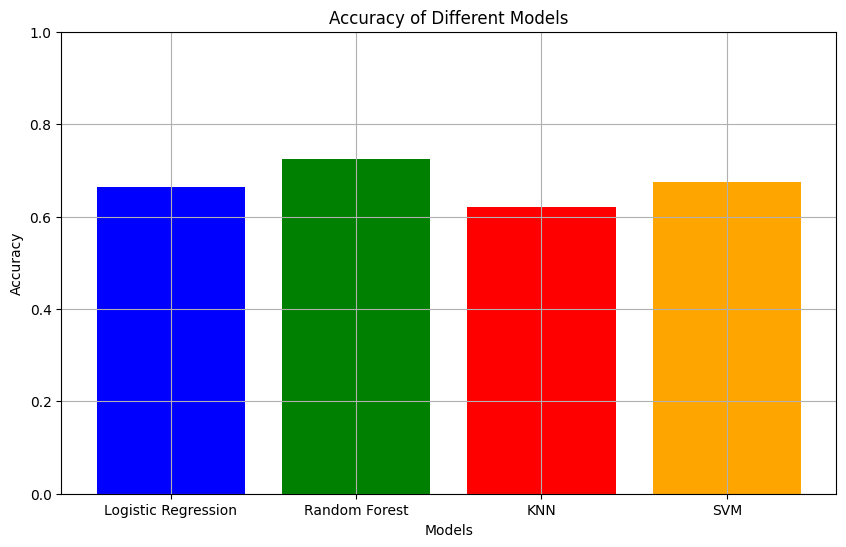

In [37]:
accuracy_scores = [accuracy_logistic, accuracy_rf, accuracy_knn, accuracy_svm]

models = ['Logistic Regression', 'Random Forest', 'KNN', 'SVM']

plt.figure(figsize=(10, 6))
plt.grid()
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1) 
plt.show()

In [38]:
precision_logistic = precision_score(y_test, y_pred_logistic)
precision_rf = precision_score(y_test, y_pred_rf)
precision_svm = precision_score(y_test, y_pred_svm)
precision_knn = precision_score(y_test, y_pred_knn)

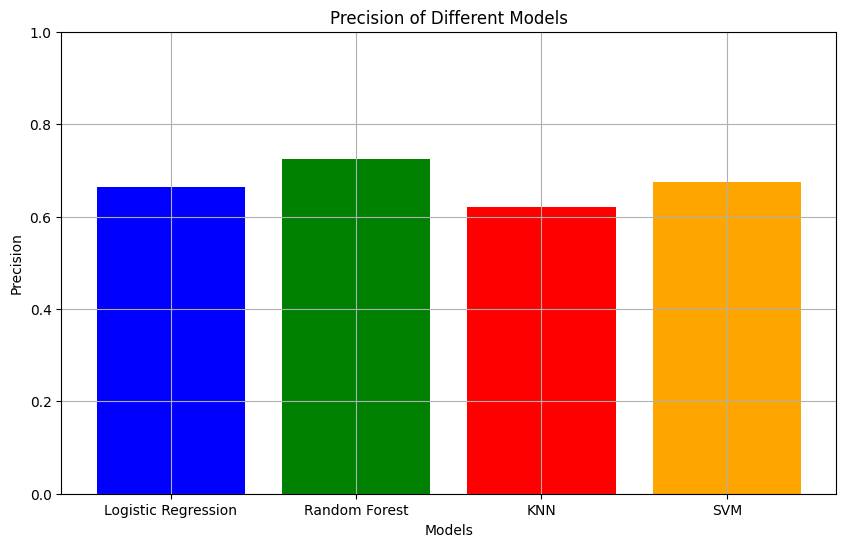

In [39]:
precision_scores = [precision_logistic, precision_rf, precision_svm, precision_knn]

models = ['Logistic Regression', 'Random Forest', 'KNN', 'SVM']
plt.figure(figsize=(10, 6))
plt.grid()
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision of Different Models')
plt.ylim(0, 1) 
plt.show()

In [40]:
f1_score_logistic = f1_score(y_test, y_pred_logistic)
f1_score_rf = f1_score(y_test, y_pred_rf)
f1_score_svm = f1_score(y_test, y_pred_svm)
f1_score_knn = f1_score(y_test, y_pred_knn)

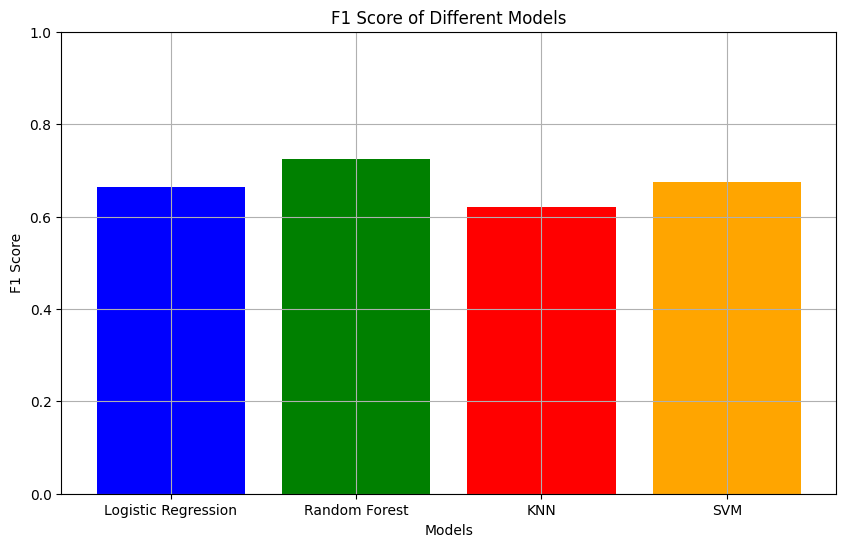

In [41]:
f1_scores = [f1_score_logistic, f1_score_rf, f1_score_svm, f1_score_knn]

models = ['Logistic Regression', 'Random Forest', 'KNN', 'SVM']
plt.figure(figsize=(10, 6))
plt.grid()
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score of Different Models')
plt.ylim(0, 1) 
plt.show()

In [42]:
grid_accuracies = [accuracy_score(y_test, y_pred_grid_lr), accuracy_score(y_test, y_pred_grid_rf), accuracy_score(y_test, y_pred_grid_svm),
                   accuracy_score(y_test, y_pred_grid_knn)]

In [43]:
grid_f1 = [f1_score(y_test, y_pred_grid_lr), f1_score(y_test, y_pred_grid_rf), f1_score(y_test, y_pred_grid_svm),
                   f1_score(y_test, y_pred_grid_knn)]

In [44]:
pca_accuracies = [accuracy_score(y_test, y_pred_pca_lr), accuracy_score(y_test, y_pred_pca_rf), accuracy_score(y_test, y_pred_pca_svm), 
                  accuracy_score(y_test, y_pred_pca_knn)]

In [45]:
pca_f1 = [f1_score(y_test, y_pred_pca_lr), f1_score(y_test, y_pred_pca_rf), f1_score(y_test, y_pred_pca_svm), 
                  f1_score(y_test, y_pred_pca_knn)]

In [46]:
dict = {'Model Type':['Logistic', 'RF', 'SVM', 'KNN'], 
        'Base Model':accuracy_scores, 
        'Grid Search':grid_accuracies,
        'PCA': pca_accuracies
       } 

In [47]:
accuracy_df = pd.DataFrame(dict)
accuracy_df

Model Type  Base Model  Grid Search       PCA
0   Logistic    0.663731     0.667734  0.664932
1         RF    0.724179     0.742994  0.674940
2        SVM    0.620096     0.673739  0.673739
3        KNN    0.675340     0.628903  0.614091

In [48]:
f1_dict = {'Model Type':['Logistic', 'RF', 'SVM', 'KNN'], 
        'Base Model':f1_scores, 
        'Grid Search':grid_f1,
        'PCA': pca_f1
       } 

In [49]:
f1_df = pd.DataFrame(f1_dict)
f1_df

Model Type  Base Model  Grid Search       PCA
0   Logistic    0.697406     0.701439  0.698813
1         RF    0.751174     0.771041  0.706859
2        SVM    0.721784     0.721748  0.720795
3        KNN    0.654281     0.668573  0.651734

Text(0.5, 1.0, 'Accuracy Score of Different Models')

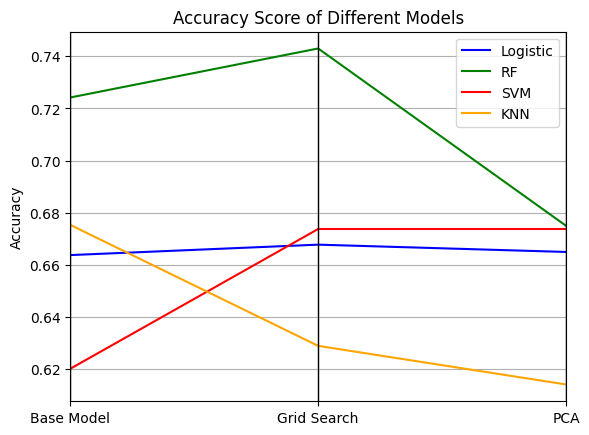

In [50]:
from pandas.plotting import parallel_coordinates


parallel_coordinates(accuracy_df, "Model Type", color=['blue', 'green', 'red', 'orange'])
plt.ylabel("Accuracy")
plt.title('Accuracy Score of Different Models')


Text(0.5, 1.0, 'F1 Score of Different Models')

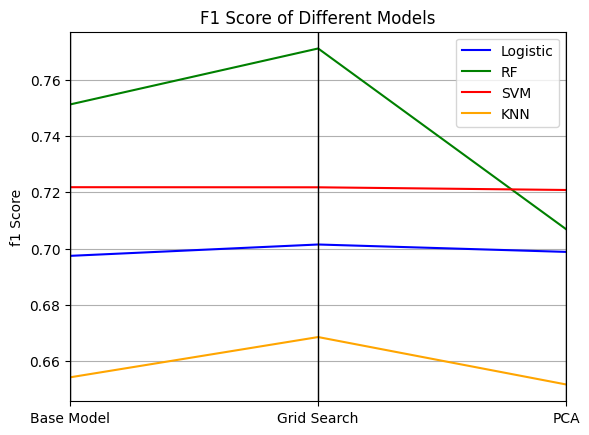

In [51]:
parallel_coordinates(f1_df, "Model Type", color=['blue', 'green', 'red', 'orange'])
plt.ylabel("f1 Score")
plt.title('F1 Score of Different Models')
